# AIRS review

In [1]:
import os
from abcli import file
from abcli.modules import objects
from abcli import fullname
from abcli.plugins import cache
from roofAI.semseg.utils import visualize
from IPython.display import Image
from abcli import string
from abcli.plugins import seed
import numpy as np

import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2378.1-2023-06-aws-batch-a, built on 15 October 2023, 16:37:25


In [2]:
dataset_object_name = cache.read("roofAI_ingest_CamVid_v1")
subset = "test"
index = 3

In [3]:
%%bash -s $dataset_object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

abcli download object $1

roofAI_ingest_CamVid_2023-10-15-15-56-03-26635 open download started.
roofAI_ingest_CamVid_2023-10-15-15-56-03-26635 download completed.


In [4]:
dataset_object_path = objects.path_of(
        "SegNet-Tutorial/CamVid/", 
        object_name=dataset_object_name
    )

In [5]:
mask_image = file.load_image(
            file.list_of(os.path.join(dataset_object_path,f"{subset}annot","*.png"))[index])[1][:,:,0]
np.unique(mask_image)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11], dtype=uint8)

loaded 360x480x3:uint8 from /Users/kamangir/storage/abcli/roofAI_ingest_CamVid_2023-10-15-15-56-03-26635/SegNet-Tutorial/CamVid/test/0001TP_009420.png


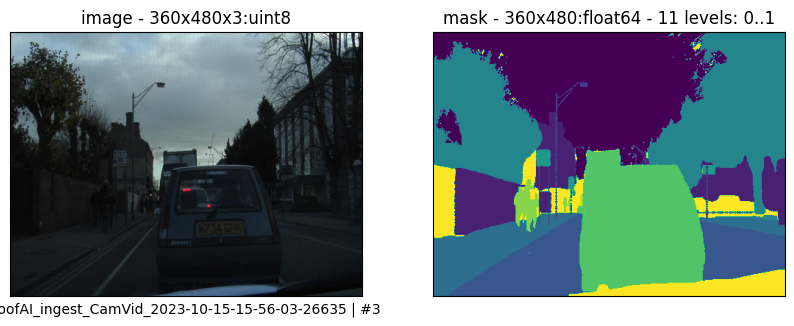

In [6]:
visualize(
    {
        "image": file.list_of(os.path.join(dataset_object_path,subset,"*.png"))[index],
        "mask": mask_image/np.max(mask_image),
    },
    in_notebook = True,
    description = [dataset_object_name, f"#{index}"])

In [7]:
seed.log(dataset_object_name)

abcli select roofAI_ingest_CamVid_2023-10-15-15-56-03-26635; open .


In [8]:
# END